## CM4044: AI In Chemistry
## Semester 1 2020/21

<hr>

## Tutorial 2a: Introduction to Matplotlib Part I
## Objectives
### $\bullet$ The Matplotlib Object Hierarchy
### $\bullet$ Plot Sine and Cosine Functions with Pyplot
### $\bullet$ Object-oriented Plotting

<hr>



Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

The online document for matplotlib is：https://matplotlib.org/index.html ，there is also [Examples](https://matplotlib.org/gallery/index.html), [tutorials](https://matplotlib.org/tutorials/index.html), [API](https://matplotlib.org/api/index.html), [Content](https://matplotlib.org/contents.html)，the [Examples](https://matplotlib.org/gallery/index.html) is very useful，as it contains different plots with free Python source codes.

The versatility of Matplotlib can be used to make many visualization types:-

- Scatter plots
- Bar charts and Histograms
- Line plots
- Pie charts
- Stem plots
- Contour plots
- Quiver plots
- Spectrograms

One can create grids, labels, legends etc. with ease since everything is customizable.

## 1. The Matplotlib Object Hierarchy

One important concept about matplotlib is its object hierarchy. A “hierarchy” here means that there is a tree-like structure of matplotlib objects underlying each plot. See the figure below:

<img src="./fig_map.jpg" width="300" height="300" />

You can think of the `Figure` object as a box-like container holding one or more `Axes` (actual plots). Below the `Axes` in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels. Here is an anatomy of plot from Matplotlib website:

<img src="./anatomy.jpg" width="450" height="450" />

The figure above is created in the matplotlib docs [here](https://matplotlib.org/examples/showcase/anatomy.html)

Before we move forward, I like you to know that Matplotlib offers two approaches in plotting: stateful and stateless interfaces. A stateful interfaces always update the state of `pyplot` by directly passing plotting "values" to corresponding attributes and functions in the package. Almost all functions from `pyplot`, such as `plt.plot()`, are implicitly either referring to an existing current Figure and current Axes, or creating them anew if none exist. 

In the second approach: a stateless approach explicitly creates `Figure` and `Axes` objects, and user set these objects attributes and methods for plotting.


## 2. Plot Sine and Cosine Functions with Pyplot


To use matplotlib, firstly you should import the package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Most of the time, `numpy` is imported with `matplotlib.pyplot` as **Numpy** array usually holds data for plotting. And in Jupyter Notebook (IPython), add this magic command:

In [2]:
# only work for IPython, including Jupyter Notebook
# with this line, no need to call the function plt.show() to display figure.
%matplotlib inline    

In the first example, we plot two curves for a sine function and consine function. There are two ways in the plotting. The first one follows matlab style. So firstly, prepare some data in two numpy arrays and do simple plot

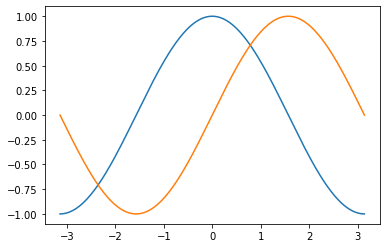

In [3]:
#Prepare data for plotting
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)
plt.plot(X, C)
plt.plot(X, S)

plt.show()

Then we plot the two functions by directly calling the methods in `pyplot` package:

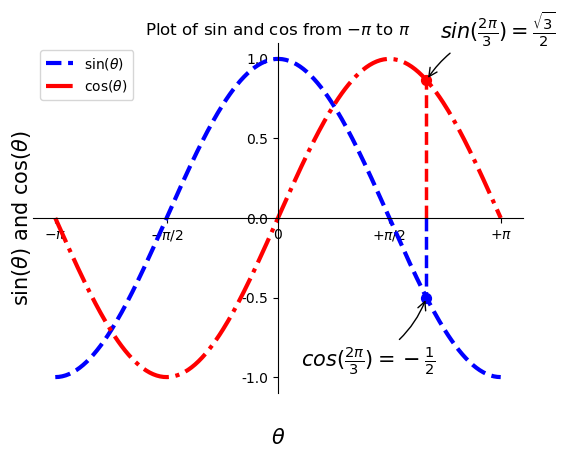

In [4]:
plt.figure(figsize=(7,5),dpi=100)  # set the figure size and dpi before plotting

plt.subplots_adjust(left=0.1, right=0.8, top=0.8, bottom=0.1)
plt.plot(X,C,color='blue',lw=3, ls='--')
plt.plot(X,S,color='red',lw=3, ls='-.')


plt.title('Plot of sin and cos from ' r'$-\pi$' ' to ' r'$\pi$')
plt.legend([r'sin($\theta$)', r'cos($\theta$)'])      # legend entries as seperate strings in a list
#plt.locator_params(axis='y', nbins=5)
#plt.locator_params(axis='x', nbins=9)
plt.xlim(X.min()*1.1,X.max()*1.1)
plt.ylim(C.min()*1.1,C.max()*1.1)

#plt.axis([-np.pi, np.pi, -1.0, 1.0])
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1.0, -0.5, 0, 0.5, 1.0], ['-1.0', '-0.5', '0.0', '0.5', '1.0'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_position(('data', 0.0))
plt.gca().spines['bottom'].set_position(('data', 0.0))

plt.xlabel(r'$\theta$', fontsize=15)  # string must be enclosed with quotes '  '
plt.ylabel(r'sin($\theta$) and cos($\theta$)', fontsize=15)

plt.gca().xaxis.set_label_coords(0.5,-0.1)
plt.gca().yaxis.set_label_coords(0.0,0.5)

t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=15,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=15,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))



#plt.grid(True)
plt.show()

## 3. Object-oriented Plotting

The second way to plot with matplotlib is based on object-oriented plotting (OOP). Two objects are created for the plot, `fig` and `ax`. Plotting is achieved from the values passing to `ax` object and properties setting to `ax` object. This approach offers clearly control on plotting style.

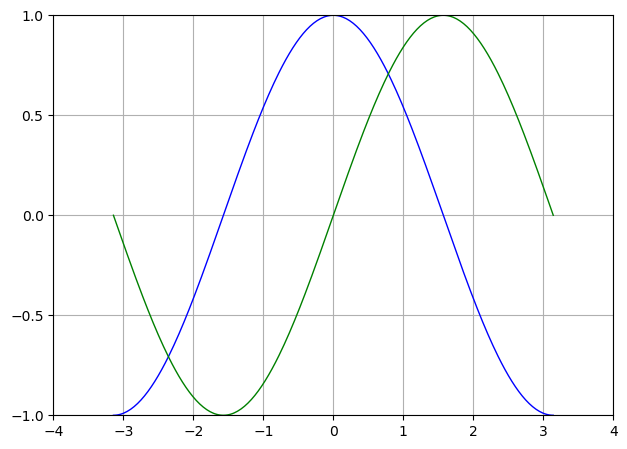

In [5]:
# Create a new figure of size 7x5 points, using 100 dots per inch
fig = plt.figure(figsize=(7,5), dpi=100)

# left, bottom, width, height (range 0 to 1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Plot cosine using blue color with a continuous line of width 1 (pixels)
#ax.plot(X, C, color="blue", linewidth=1.0, linestyle="-")
ax.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine using green color with a continuous line of width 1 (pixels)
ax.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
ax.set_xlim(-4.0,4.0)

# Set x ticks
ax.set_xticks(np.linspace(-4,4,9,endpoint=True))

# Set y limits
ax.set_ylim(-1.0,1.0)

# Set y ticks
ax.set_yticks(np.linspace(-1,1,5,endpoint=True))

# Save figure using 72 dots per inch
# savefig("../figures/exercice_2.png",dpi=72)
plt.grid(True)
# Show result on screen
plt.show()

So, the general work flow to plot in matplotlib is:

1. Prepare data for plotting
2. Create a Figure object
3. Create an Axes object
4. Choose a type of plot to present data
5. Add label, text, legend, annotation, and so on
6. Refinement

## 3. Add Artists

## 3.1 Change line colour, widths, and style

We can set line colour, widths, and style, the arguments in the `subplot()` function:

    colour
    linewidth
    linestyle
   
   
The colour options are:

letter | colour
-- | -- 
`‘b’`|	blue
`‘g’`|	green
`‘r’`|	red
`‘c’`|	cyan
`‘m’`|	magenta
`‘y’`|	yellow
`‘k’`|	black
`‘w’`|	white

The linesytle options are:

symbol |style | symbol |style
---|--- | --- | ---
`  '-'	`| solid line| `'--'`|	dash line
`'-.'`|	dash dotted line | `':'`|	dotted line



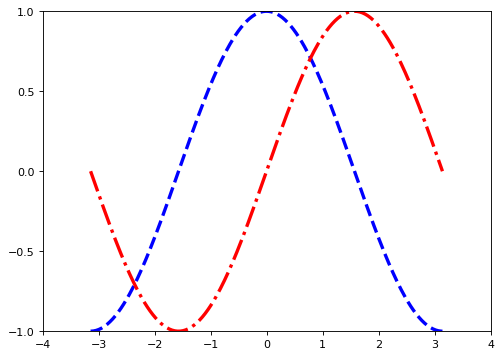

In [6]:
# Create a new figure of size 7x5 points, using 100 dots per inch
fig = plt.figure(figsize=(7,5), dpi=80)

# Create a new subplot from a grid of 1x1
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.plot(X, C, color="blue", linewidth=3., linestyle="--")

ax.plot(X, S, color="red", linewidth=3., linestyle="-.")

# Set x limits
ax.set_xlim(-4.0,4.0)

# Set x ticks
ax.set_xticks(np.linspace(-4,4,9,endpoint=True))

# Set y limits
ax.set_ylim(-1.0,1.0)

# Set y ticks
ax.set_yticks(np.linspace(-1,1,5,endpoint=True))

# Show result on screen
plt.show()

## 3.2 Set axis limit, axis ticks and ticklabels

In the current plot, we set x_min = -4.0 and x_max = 4.0 as y_min = -1.0 and y_max = 1.0, which is too tight for the two curves. We can set the value based on the range of x and y multiplying with a factor. And the ticks in x axis is not ideal as it doesn't show the value or fraction value of π.

We can set these objects value by calling these functions: `ax.set_xlim()`, `ax.set_ylim()`, `ax.set_xticks()`, `ax.set_yticks()`, `ax.set_xticklabels()`, and `ax.set_yticklabels()`. For example,

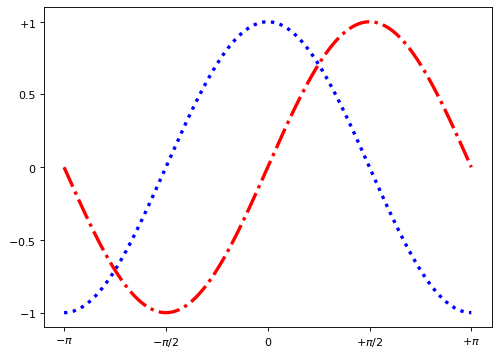

In [7]:
# Create a new figure of size 7x5 points, using 100 dots per inch
fig = plt.figure(figsize=(7,5), dpi=80)

# Create a new subplot from a grid of 1x1
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.plot(X, C, color="b", linewidth=3., linestyle=":")

ax.plot(X, S, color="r", linewidth=3., linestyle="-.")

# Set x limits
ax.set_xlim(X.min()*1.1,X.max()*1.1)

# Set x ticks 
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# Set x ticklabels
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

# Set y limits
ax.set_ylim(C.min()*1.1, C.max()*1.1)

# Set y ticks
ax.set_yticks([-1, -0.5, 0, 0.5, +1])

ax.set_yticklabels([r'$-1$', r'$-0.5$', r'$0$', r'0.5', r'$+1$'])

# Show result on screen
plt.show()

## 3.3 Move spines to center and add legend

**Spines** are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions and until now, they were on the border of the axis. We'll change that since we want to have them in the middle. Since there are four of them (top/bottom/left/right), we'll discard the top and right by setting their color to none and we'll move the bottom and left ones to coordinate 0 in data space coordinates.

We can add the legend to the plot too. To add legend, we add one more argument `label` to `ax.plot()` function, then we call
`ax.legend(loc='upper left')` to display legend.

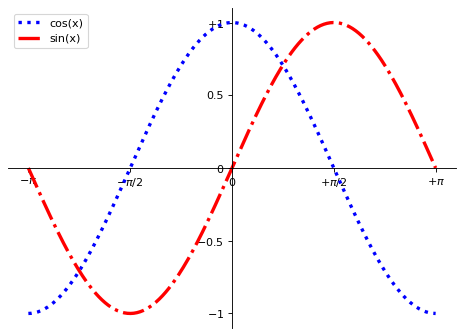

In [8]:
# Create a new figure of size 7x5 points, using 100 dots per inch
fig = plt.figure(figsize=(7,5), dpi=80)

# Create a new subplot from a grid of 1x1
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.spines['right'].set_color('none')  # hide the right spine
ax.spines['top'].set_color('none')    # hide the top spine
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(X, C, color="blue", linewidth=3., linestyle=":", label='cos(x)')

ax.plot(X, S, color="red", linewidth=3., linestyle="-.", label='sin(x)')

# Set x limits
ax.set_xlim(X.min()*1.1,X.max()*1.1)

# Set x ticks 
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# Set x ticklabels
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

# Set y limits
ax.set_ylim(C.min()*1.1, C.max()*1.1)

# Set y ticks
ax.set_yticks([-1, -0.5, 0, 0.5, +1])

ax.set_yticklabels([r'$-1$', r'$-0.5$', r'$0$', r'0.5', r'$+1$'])

ax.legend(loc='upper left')


# Show result on screen
plt.show()

## 3.4 Add annotation

Let's annotate some interesting points using the annotate command. We chose the 2π/3 value and we want to annotate both the sine and the cosine. We'll first draw a marker on the curve as well as a straight dotted line. Then, we'll use the `ax.annotate()` function to display some text with an arrow.

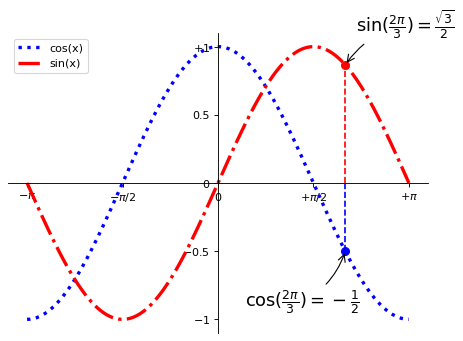

In [9]:
# Create a new figure of size 7x5 points, using 100 dots per inch
fig = plt.figure(figsize=(7,5), dpi=80)

# Create a new subplot from a grid of 1x1
ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])

# move the spines to center
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# plot the two curves
ax.plot(X, C, color="blue", linewidth=3., linestyle=":", label='cos(x)')
ax.plot(X, S, color="red", linewidth=3., linestyle="-.", label='sin(x)')

# Set x limits
ax.set_xlim(X.min()*1.1,X.max()*1.1)

# Set x ticks 
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# Set x ticklabels
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

# Set y limits
ax.set_ylim(C.min()*1.1, C.max()*1.1)

# Set y ticks
ax.set_yticks([-1, -0.5, 0, 0.5, +1])

ax.set_yticklabels([r'$-1$', r'$-0.5$', r'$0$', r'0.5', r'$+1$'])

ax.legend(loc='upper left')

# add annotation
t = 2*np.pi/3
ax.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=1.5, linestyle="--")
ax.scatter([t,],[np.cos(t),], 50, color ='blue')

ax.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

ax.plot([t,t],[0,np.sin(t)], color ='red', linewidth=1.5, linestyle="--")
ax.scatter([t,],[np.sin(t),], 50, color ='red')

ax.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Show result on screen
plt.show()

## 3.5 Refine the font size of tick labels in x and y axis

In the above plot, the tick labels are now hardly visible because of the blue and red lines. We can make them bigger and we can also adjust their properties such that they'll be rendered on a semi-transparent white background. This will allow us to see both the data and the labels.

So we have to loop over the tick labels and reset their font size and other drawing properties.

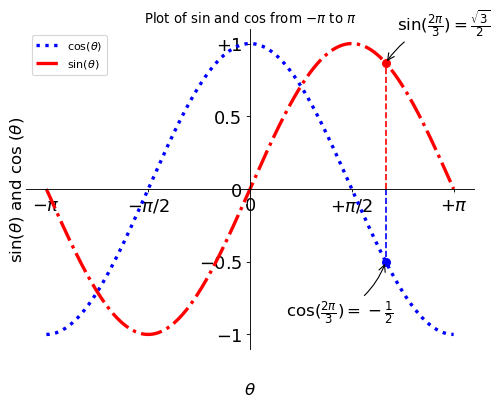

In [10]:
# Create a new figure of size 7x5 points, using 100 dots per inch
fig = plt.figure(figsize=(7,5), dpi=80)

# Create a new subplot from a grid of 1x1
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# move the spines to center
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# plot the two curves
ax.plot(X, C, color="blue", linewidth=3., linestyle=":", label=r'cos($\theta$)')
ax.plot(X, S, color="red", linewidth=3., linestyle="-.", label=r'sin($\theta$)')

# Set x limits
ax.set_xlim(X.min()*1.1,X.max()*1.1)

# Set x ticks 
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# Set x ticklabels
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

# Set y limits
ax.set_ylim(C.min()*1.1, C.max()*1.1)

# Set y ticks
ax.set_yticks([-1, -0.5, 0, 0.5, +1])

ax.set_yticklabels([r'$-1$', r'$-0.5$', r'$0$', r'0.5', r'$+1$'])

ax.legend(loc='upper left')

# add annotation
t = 2*np.pi/3
ax.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=1.5, linestyle="--")
ax.scatter([t,],[np.cos(t),], 50, color ='blue')

ax.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=15,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

ax.plot([t,t],[0,np.sin(t)], color ='red', linewidth=1.5, linestyle="--")
ax.scatter([t,],[np.sin(t),], 50, color ='red')

ax.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=15,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# refine the drawing properties
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

    
ax.set_title('Plot of sin and cos from ' r'$-\pi$' ' to ' r'$\pi$')

ax.set_ylabel('sin' r'($\theta$)' ' and cos ' r'($\theta$)', fontsize=15)
ax.yaxis.set_label_coords(0.0,0.5)
ax.set_xlabel(r'$\theta$', fontsize=15)
ax.xaxis.set_label_coords(0.5,-0.1)
#plt.grid(True)
# Show result on screen
plt.show()